In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller

In [2]:
# Generating the sampe data
np.random.seed(0)
dates=pd.date_range(start='2024-01-01', end='2024-12-31')
data=np.random.randn(len(dates))
data=np.cumsum(data) # Cumulative sum to make random data
df=pd.DataFrame(data,index=dates,columns=['value'])

In [4]:
# Split the data into train and test sets
train_size=int(len(df)*0.8) # 80% data for training
train,test=df[:train_size],df[train_size:]
#check stationarity
def check_stationarity(timeseries):
    #perform adfuller
    result=adfuller(timeseries)
    print('ADF Statistics:',result[0])
    print('p-value',result[1])
    print('Critical Value:')
    for key, value in result[4].items():
        print('\t%s: %.3f' %(key, value))
        
check_stationarity(train['value'])

ADF Statistics: -1.5942103292193865
p-value 0.48650119742142195
Critical Value:
	1%: -3.453
	5%: -2.872
	10%: -2.572


In [7]:
# if data is not stationary, then take first difference
train_diff=train.diff().dropna()
check_stationarity(train_diff['value'])
#Fit a linear regression model based on train and test data
X_train=np.arange(len(train)).reshape(-1,1) #multiple ex var
y_train=train['value'] # one response var

ADF Statistics: -17.306885527845136
p-value 5.584898848051816e-30
Critical Value:
	1%: -3.453
	5%: -2.872
	10%: -2.572


C:\Users\acer\AppData\Local\Temp\ipykernel_18268\3266994168.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predictions_diff=fitted_model.forecast(steps=len(test))[0]


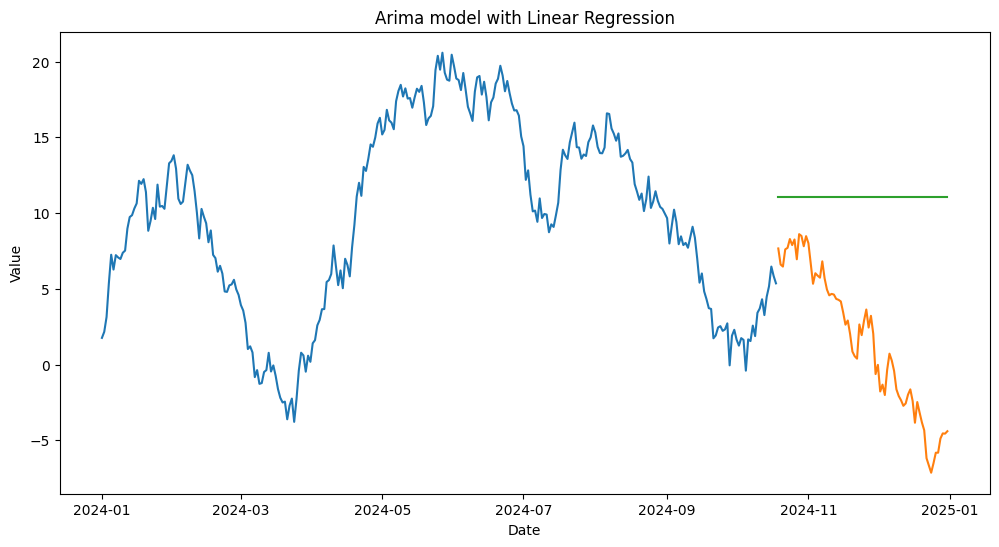

In [9]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
trend=regressor.predict(X_train)
#Fit ARIMA model on residuals
model=ARIMA(train_diff, order=(5,1,0)) # ARIMA p=5, d=1, q=0
fitted_model=model.fit()
#Predict using the fitted ARIMA model
predictions_diff=fitted_model.forecast(steps=len(test))[0]
predictions_diff=pd.Series(predictions_diff, index=test.index)
#Add trend for obtaining the final predictions
predictions=predictions_diff+trend[-1]
#plotting the graph
plt.figure(figsize=(12,6))
plt.plot(train.index, train['value'],label='Training data')
plt.plot(test.index,test['value'],label='Testing data')
plt.plot(predictions.index, predictions, label='Predictions')
plt.title('Arima model with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()